In [1]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from fastbook import *
from katlas.core import *
from katlas.train import *
from katlas.plot import *
from katlas.feature import *
from sklearn.model_selection import StratifiedGroupKFold
import seaborn as sns

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# T5 kinase feature + aa rdkit

> Use protein featurees from T5 model and aa features from rdkit descriptors

## Prepare dataset

### Amino acid

In [4]:
aa = Data.get_aa_feature()

In [5]:
aa.head()

,aa,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,HallKierAlpha,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SlogP_VSA1,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,FractionCSP3,NumAliphaticHeterocycles,NumAromaticHeterocycles,NumHAcceptors,MolLogP,fr_Al_COO,fr_Al_OH,fr_C_O,fr_NH0,fr_NH1,fr_sulfide,fr_unbrch_alkane
0,A,9.574074,1.193554,0.430590,-0.375462,-1.439770,0.228166,-0.308911,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,0.678178,-1.660842,0.058766,-0.928528,0.661861,-1.704924,-1.164169,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,-0.308393,-0.647398,-0.224260,-0.480351,-0.694405,-0.882977,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,-0.482124,-1.373429,-0.884527,-0.45843,-0.213201,-0.535127,-0.661160,-0.922850,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,-0.626017,-0.748232,-0.483822,0.342808,-0.462400,0.572190,0.349099,-0.213201,-0.308607,-1.192079,-0.082356,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607
1,C,9.756435,-0.594121,0.396312,-0.623715,-0.643882,0.233514,-0.311825,1.656688,1.401076,0.150357,1.981889,1.146308,-0.628535,0.696026,-0.795604,0.077060,0.765682,-0.684106,0.233728,-0.790419,1.460660,-0.601392,-0.581437,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,3.364183,-0.647398,-1.107502,0.556864,-0.694405,2.015850,-0.432331,-0.495561,-1.340339,0.914158,-0.511968,-0.482124,-0.257709,-0.884527,-0.45843,-0.213201,-0.535127,-0.661160,0.310554,-0.621218,-0.611041,-0.440926,-0.455591,2.765813,-0.626017,-0.709478,-0.437633,0.631861,-0.462400,-0.522169,0.349099,-0.213201,-0.308607,0.331133,-0.196341,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607
2,D,9.846435,0.536545,0.158193,-0.369303,-0.347487,0.037668,-0.205110,-1.033743,-1.273733,-1.372129,-0.525782,0.115873,0.346261,0.398995,-0.516138,-0.084662,-3.545366,-0.722995,0.822870,-0.281516,-0.547747,-0.442263,0.200980,0.373629,-0.113045,-0.213201,-0.308607,1.500960,1.050911,-0.458413,-0.308393,-0.647398,-1.107502,-0.480351,1.110102,0.487224,-0.432331,-0.495561,-0.366786,-0.695145,-0.511968,-0.482124,0.774640,0.433147,-0.45843,-0.213201,1.741627,1.556719,-0.922850,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,0.487402,1.474811,-0.483206,-2.651958,-0.936726,-0.522169,-0.429755,-0.213201,-0.308607,0.331133,-0.772086,3.240370,-0.308607,2.179449,-0.213201,-0.428746,-0.213201,-0.308607
3,E,9.993880,-1.144174,0.263960,-0.056770,0.000656,0.028134,-0.199915,-1.248978,-1.218664,-0.661636,-0.526379,-0.271923,0.069844,0.109885,-0.172745,0.256753,-0.437180,-0.085041,0.534017,-0.174262,-0.547747,0.361706,0.487383,0.373629,-0.113045,-0.213201,-0.308607,1.500960,1.050911,-0.458413,-0.308393,-0.647398,-0.288416,0.677296,-0.694405,0.487224,-0.432331,-0.495561,0.606766,-0.695145,-0.511968,-0.482124,0.774640,0.433147,-0.45843,-0.213201,0.561766,1.556719,1.830379,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,0.487402,1.540314,-0.410105,-2.063646,-0.662030,-0.522169,0.037557,-0.213201,-0.308607,0.331133,-0.278572,3.240370,-0.308607,2.179449,-0.213201,-0.428746,-0.213201,-0.308607
4,F,10.378642,0.050359,0.433525,1.825444,0.448946,0.231079,-0.310499,-1.168265,-0.723037,0.404105,-0.526883,-0.818551,-0.069808,-0.311742,0.192350,-0.048318,0.413831,0.726870,-1.313071,0.839266,-1.118318,0.399290,-0.669480,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,-0.308393,2.903823,0.421299,-0.480351,-0.694405,-

In [6]:
aa.shape

(23, 73)

In [7]:
# Use PCA to reduce dimension
aa_pca = get_pca(aa,10)

In [8]:
aa_pca.head()

,aa,aa_PCA1,aa_PCA2,aa_PCA3,aa_PCA4,aa_PCA5,aa_PCA6,aa_PCA7,aa_PCA8,aa_PCA9,aa_PCA10
0,A,-4.852031,-2.249919,-0.461327,-1.416531,-0.337914,0.513894,-0.056808,0.833034,-1.127711,0.842000
1,C,-3.213352,-1.699523,3.189200,-0.265951,1.811946,2.088905,-1.583068,-0.483111,1.266202,-0.753519
2,D,3.050048,-4.495225,-0.743766,-2.307944,-2.553905,-1.916562,0.805247,-2.844308,0.172178,-0.451505
3,E,2.873347,-2.344768,-1.216389,-1.371575,-2.786402,0.215562,0.891547,-2.459808,1.898752,0.060548
4,F,-0.630406,4.541536,-2.464032,-2.528216,-0.388043,0.554349,-1.136118,-0.456329,-2.472756,0.709053


get non-linear dimensionality reduction

### Kinase Protein

In [9]:
prot = Data.get_t5()

In [10]:
prot.head()

,kinase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,...,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,AAK1,0.07580,0.12350,0.04422,0.024140,-0.02098,0.01865,-0.051670,-0.07400,-0.000197,

In [11]:
prot_pca = get_pca(prot,64)

In [12]:
prot_pca.head()

,kinase,kinase_PCA1,kinase_PCA2,kinase_PCA3,kinase_PCA4,kinase_PCA5,kinase_PCA6,kinase_PCA7,kinase_PCA8,kinase_PCA9,kinase_PCA10,kinase_PCA11,kinase_PCA12,kinase_PCA13,kinase_PCA14,kinase_PCA15,kinase_PCA16,kinase_PCA17,kinase_PCA18,kinase_PCA19,kinase_PCA20,kinase_PCA21,kinase_PCA22,kinase_PCA23,kinase_PCA24,kinase_PCA25,kinase_PCA26,kinase_PCA27,kinase_PCA28,kinase_PCA29,kinase_PCA30,kinase_PCA31,kinase_PCA32,kinase_PCA33,kinase_PCA34,kinase_PCA35,kinase_PCA36,kinase_PCA37,kinase_PCA38,kinase_PCA39,kinase_PCA40,kinase_PCA41,kinase_PCA42,kinase_PCA43,kinase_PCA44,kinase_PCA45,kinase_PCA46,kinase_PCA47,kinase_PCA48,kinase_PCA49,kinase_PCA50,kinase_PCA51,kinase_PCA52,kinase_PCA53,kinase_PCA54,kinase_PCA55,kinase_PCA56,kinase_PCA57,kinase_PCA58,kinase_PCA59,kinase_PCA60,kinase_PCA61,kinase_PCA62,kinase_PCA63,kinase_PCA64
0,AAK1,-0.257443,0.003306,0.174313,-0.180450,0.066599,-0.040672,0.072412,-0.022321,-0.158459,0.016125,0.001576,0.001927,0.074540,0.062981,0.056418,-0.117819,0.082655,0.057587,0.006607,-0.009156,0.018097,-0.082953,0.004995,-0.036941,-0.033180,-0.027166,-0.021015,-0.067162,-0.012006,0.007342,0.018522,-0.010736,-0.051126,-0.039011,-0.042617,-0.031959,0.035989,0.040258,-0.021821,-0.016495,0.031720,0.019359,-0.006077,0.022511,-0.010108,-0.017013,0.017910,0.017594,0.065556,0.031809,0.032000,0.002619,0.056579,0.056536,0.011424,-0.010676,0.005624,-0.042825,0.001763,-0.012979,-0.001634,0.003439,-0.019134,-0.013783
1,ALK2,-0.318117,0.107869,0.241401,-0.253591,0.191336,0.081930,0.085864,0.258866,0.013555,-0.056565,-0.009710,-0.077578,-0.058959,0.012344,0.082655,0.016128,-0.018729,-0.062637,-0.000786,-0.016948,0.029509,-0.007155,0.068065,0.037332,-0.043031,-0.026122,-0.038203,0.023040,-0.064037,-0.023679,0.023565,0.061762,-0.062243,-0.028762,-0.002485,-0.004794,0.058102,0.026317,0.039804,-0.002600,-0.035513,-0.000300,-0.010447,0.006673,0.002031,0.027088,0.024033,0.040119,0.031368,-0.032475,0.006729,0.003928,-0.002909,0.029635,-0.017032,0.004405,0.004897,0.023781,0.011040,0.005065,0.042979,0.010374,0.019635,-0.028305
2,ALK4,-0.259614,0.122514,0.225263,-0.274495,0.169574,0.099429,0.061590,0.273497,0.019937,-0.025211,0.001499,-0.066607,-0.055460,0.038299,0.068466,0.050106,-0.040306,-0.079053,0.005596,-0.009659,0.057157,-0.009838,0.059260,0.055387,-0.024861,-0.000060,-0.016279,-0.007284,-0.042402,0.006567,0.009240,0.062876,-0.036811,-0.001647,0.006542,-0.000902,0.056552,-0.015947,0.062752,-0.030248,-0.047733,-0.037076,-0.025268,0.021830,-0.003745,0.012554,0.010700,0.028688,0.001157,-0.028933,-0.025470,-0.012886,-0.012858,0.018201,-0.039819,0.011511,-0.004277,0.016625,-0.002181,0.029636,0.037067,-0.023639,0.022333,0.010438
3,ACVR2A,-0.150220,0.073302,0.308196,-0.238646,0.105586,0.033188,0.069498,0.221664,-0.001412,-0.032614,-0.029324,-0.062901,0.024985,0.015759,0.046197,0.045294,-0.000006,-0.056313,0.006324,0.017413,0.061269,-0.004388,0.041262,-0.027565,-0.061847,0.004643,0.006507,0.044089,0.024325,0.022731,0.027216,-0.029711,-0.066039,0.016742,0.019602,0.034781,0.040937,-0.016112,0.018979,-0.052120,-0.030294,-0.049378,-0.001516,0.005815,-0.052004,-0.027060,-0.014207,0.046313,0.014451,-0.034136,0.018856,0.009514,-0.013288,0.002985,0.002592,0.016959,-0.017130,-0.000488,-0.014951,-0.005467,0.028269,-0.011457,-0.017786,0.027410
4,ACVR2B,-0.142741,0.066838,0.308167,-0.226747,0.101209,0.050273,0.049103,0.256594,0.031583,-0.046782,-0.034158,-0.052944,-0.013263,-0.013480,0.026533,0.037413,-0.002465,-0.053529,0.025498,0.010946,0.067472,0.027553,0.042502,-0.029007,-0.044327,-0.014437,0.003456,0.050002,0.010618,0.017557,0.004048,-0.023954,-0.065627,0.013174,0.053760,0.064169,0.032358,0.009812,0.022070,-0.052905,-0.020121,-0.050300,0.000614,0.006202,-0.039694,-0.020097,-0.010555,0.047115,0.007863,-0.033106,0.007134,-0.002238,0.000200,0.003847,0.017394,0.017234,-0.023466,0.006423,-0.024473,-0.021968,0.036521,-0.003095,-0.015215,0.024910


### Target

In [13]:
target = pd.read_csv('q85_average_upper40_unstack.csv')

In [14]:
target.shape

(59994, 5)

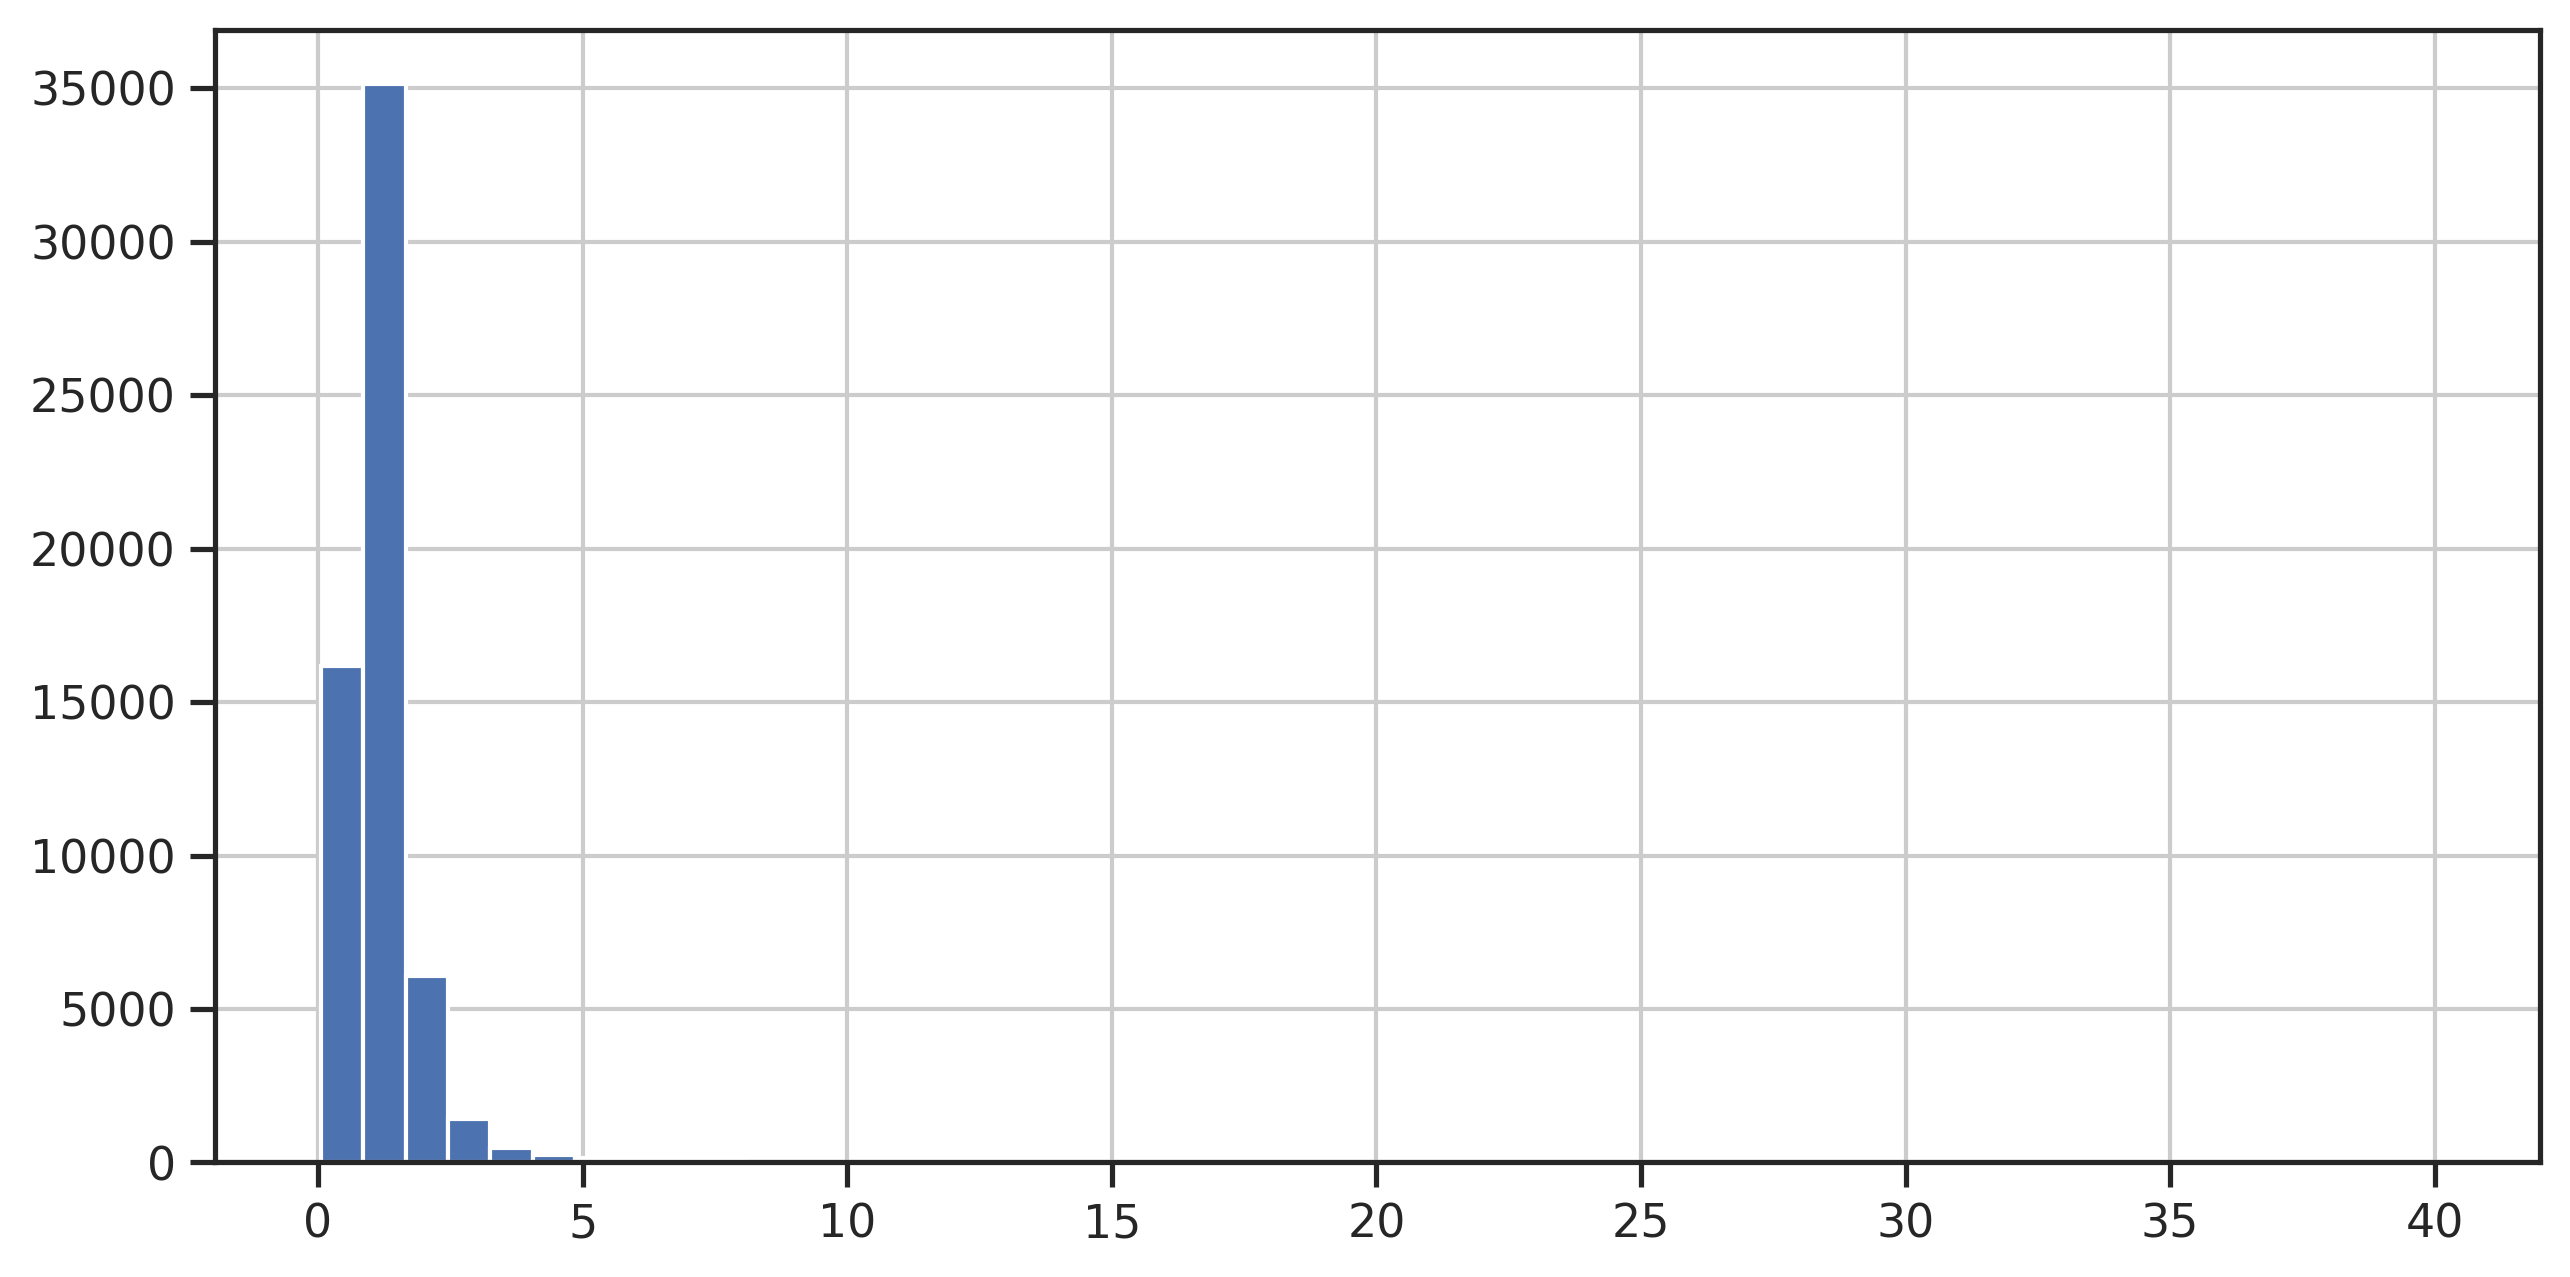

In [15]:
target.target.hist(bins=50,figsize=(10,5));

### Concatenate all together

In [16]:
target

,kinase,substrate,target,position,aa
0,AAK1,-5P,1.667971,-5,P
1,ACVR2A,-5P,0.843088,-5,P
2,ACVR2B,-5P,1.004800,-5,P
3,AKT1,-5P,1.144905,-5,P
4,AKT2,-5P,1.234496,-5,P
...,...,...,...,...,...
59989,YANK2,4y,11.963803,4,y
59990,YANK3,4y,10.646563,4,y
59991,YSK1,4y,0.446245,4,y
59992,YSK4,4y,0.819393,4,y


In [17]:
df = target.merge(aa_pca,'left').merge(prot_pca,'left')

In [18]:
# check order
(df.kinase == target.kinase).value_counts()

True    59994
Name: kinase, dtype: int64

In [20]:
df.to_csv('df_pca.csv',index=False)